Utilizar los datos de Titanic para predecir la variable respuesta Survived a partir de

a) un arbol de decision.

b) un arbol de decision podado, eligiendo el parametro α mediante validacion cruzada.

c) bagging.

d) un bosque aleatorio.

e) boosting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree


In [2]:
df = pd.read_csv("C:\\Users\\dario\\OneDrive\\Escritorio\\Unab\\Inferencia y Patrones\\Comisión 2 Florencia Statti\\Datos para Ejercicios\\datos_titanic.csv")

In [3]:
#Eliminamos las columnas a no utilizar
X = df.drop(["Survived", "Name", "Ticket", "Cabin"], axis = 1)

#Transformamos las variables tipo str a int
le = LabelEncoder()
X["Embarked"] = le.fit_transform(X["Embarked"])
X["Sex"] = le.fit_transform(X["Sex"])

#Reemplazamos datos faltantes

promedio = np.nanmean(X["Age"])


X["Age"] = np.where(np.isnan(X["Age"]), promedio, X["Age"])


In [16]:
y = df["Survived"]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.80)

In [17]:
arbol_base = DecisionTreeClassifier(random_state= 42)

In [18]:
#Bagging con 100 árboles

modelo_bagging = BaggingClassifier(
    estimator= arbol_base,
    n_estimators = 100,
    bootstrap = True,
    random_state = 42
)

modelo_bagging.fit(X_train, y_train)

prediccion = modelo_bagging.predict(X_test)

In [19]:
print("Punto C realizado con Bagging, obtuvo")
print(f"Precision: {accuracy_score(prediccion, y_test)}")

Punto C realizado con Bagging, obtuvo
Precision: 0.7798036465638148


In [20]:
#Matriz de Confusion
cm = confusion_matrix(y_test, prediccion)

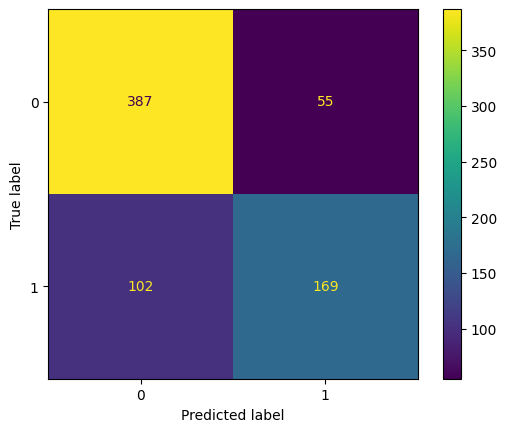

In [21]:
#Graficamos la matriz
ConfusionMatrixDisplay(cm).plot()